# Lecture 11 Spatial data visualization

## Get a few packages installed

In [ ]:
!pip install -U geopandas
!pip install -U geoplot
!pip install -U mapclassify
!pip install -U netcdf4
!pip install -U folium

In [ ]:
!pip list

In [4]:
%matplotlib inline

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'Latitude')

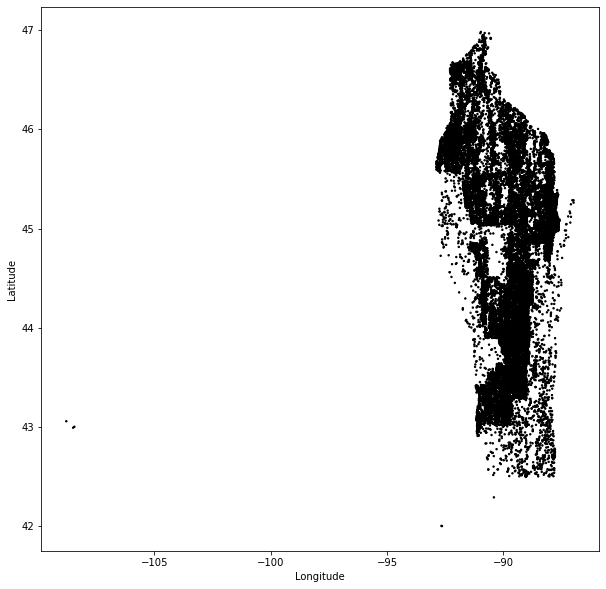

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

WI_fire = pd.read_csv("WI_fire.csv")

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.FIRE_SIZE, cmap='gray')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

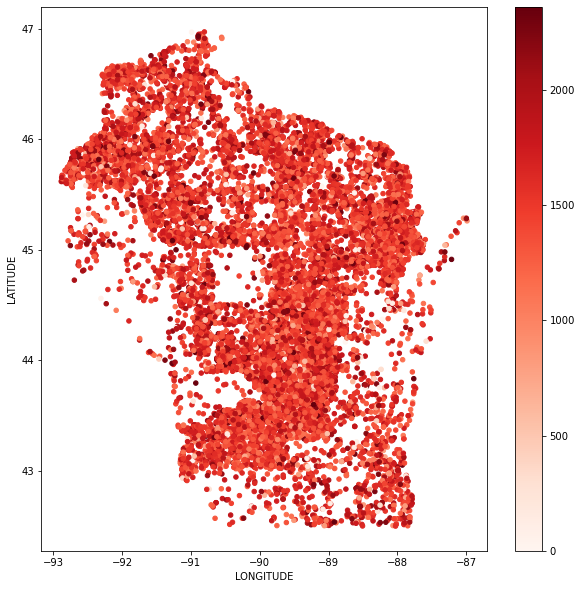

In [3]:
WI_fire = WI_fire.loc[(WI_fire.LATITUDE>42.5) & (WI_fire.LONGITUDE >-95)]

fig,ax = plt.subplots(figsize=(10,10))
#ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.CONT_TIME, cmap='Reds')
#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

# alternative way
WI_fire.plot(ax=ax, x="LONGITUDE", y="LATITUDE", kind="scatter", c=WI_fire.CONT_TIME, cmap='Reds')

In [4]:
import geopandas as gpd

WI = gpd.read_file("WI_County_Boundaries_24K/County_Boundaries_24K.shp")
print(WI.crs)
WI_wgs84 = WI.to_crs({'init': 'epsg:4269'})
print(WI_wgs84.crs)

PROJCS["NAD_1983_HARN_Wisconsin_TM",GEOGCS["GCS_North_American_1983_HARN",DATUM["D_North_American_1983_HARN",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-90],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",520000],PARAMETER["false_northing",-4480000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


+init=epsg:4269 +type=crs


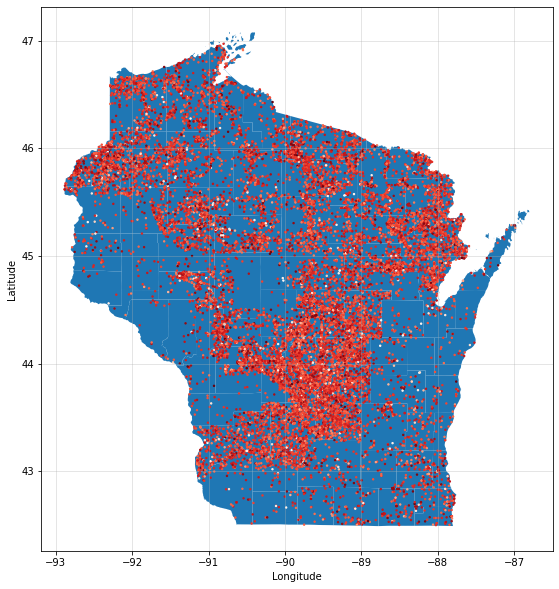

In [30]:

import geoplot as gplt
import geoplot.crs as gcrs

fig, ax = plt.subplots(figsize=(10,10))
#gplt.polyplot(WI_wgs84, ax=ax)
WI_wgs84.plot(ax=ax)
ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.CONT_TIME, cmap='Reds')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(b=True, alpha=0.4)

In [14]:

import geopandas as gpd

world = gpd.read_file("World_Countries_shp/World_Countries__Generalized_.shp")
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


<AxesSubplot:>

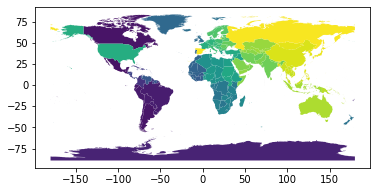

In [96]:
# The simpliest map of world countries
world.plot("FID")

<AxesSubplot:>

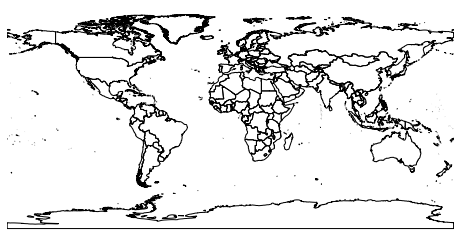

In [18]:
import geoplot as gplt
gplt.polyplot(world)

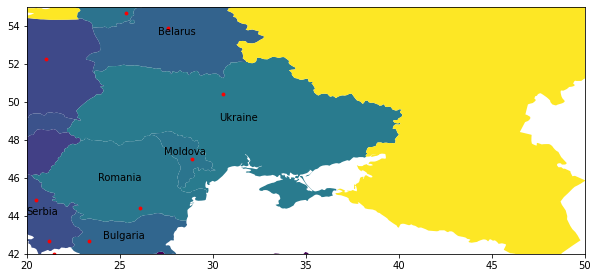

In [148]:
world = gpd.read_file("World_Countries_shp/World_Countries__Generalized_.shp")
Ukraine = world.loc[world['COUNTRYAFF'].isin(['Ukraine', 'Belarus','Russian Federation',
                                              'Moldova', 'Romania','Poland','Bulgaria',
                                              'Turkey','Serbia','Hungary','Slovakia','Lithuania'])]
fig, ax = plt.subplots(figsize=(10,10))
Ukraine.plot(ax=ax, column='FID')
ax.set_xlim(20, 50)
ax.set_ylim(42, 55)
cities.plot(ax=ax, marker='o', color='red', markersize=8)

for i,c in Ukraine.iterrows():
    ax.annotate(text=c["COUNTRYAFF"], xy=c.geometry.centroid.coords[0], ha='center')


In [26]:
import netCDF4 as nc
ds = nc.Dataset("amaps.nc")
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.1
    title: GISTEMP Surface Temperature Analysis: January 2022 L-OTI(degC) Anomaly vs 1951-1980
    institution: NASA Goddard Institute for Space Sciences
    source: https://data.giss.nasa.gov/gistemp/
    history: Created 2022-02-28 23:07 EST by amaps_netcdf.cgi 1.2 using parameters GHCNv4_ERSSTv5_1200km_Anom_1_2022_2022_1951_1980_100_180_90_0_2_
    dimensions(sizes): lat(90), lon(180)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 TEMPANOMALY(lat, lon)
    groups: 

In [27]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 90
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180


In [28]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 TEMPANOMALY(lat, lon)
    long_name: Temperature anomaly
    standard_name: surface_temperature_anomaly
    missing_value: 9999.0
    units: K
unlimited dimensions: 
current shape = (90, 180)
filling on, default _FillValue of 9.969209968386869e+36 used


/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_2423/1743442683.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(xx, yy, Tanorm,


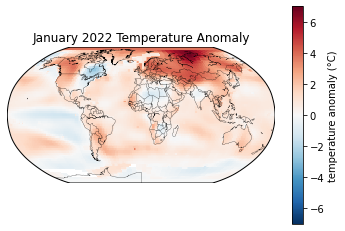

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
Tanorm = ds.variables['TEMPANOMALY'][:]

m = Basemap(projection='robin',
              #llcrnrlon=-93.,
              #llcrnrlat=35.,
              #urcrnrlon=-73.,
              #urcrnrlat=45.,
              #resolution='l',
           lat_0=0, lon_0=0) 
# projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)

xx, yy = np.meshgrid(lon, lat)
m.pcolormesh(xx, yy, Tanorm,
             latlon=True,
             cmap='RdBu_r')
plt.clim(-7, 7)
plt.title('January 2022 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

In [38]:
import folium
# Create a map using Stamen Terrain, centered on study area with set zoom level
m = folium.Map(location=[43.07, -89.40],
               #tiles='Stamen Terrain', 
               tiles='stamentoner',
               zoom_start = 13)

map_bounds = [[40., -95], 
              [45, -85]]

locations = WI_fire[["LATITUDE","LONGITUDE"]]
locationlist = locations.values.tolist()

for point in range(0, 100):
    folium.Marker(locationlist[point], popup = WI_fire['FOD_ID'][point]).add_to(m)
m


1.029849527383098

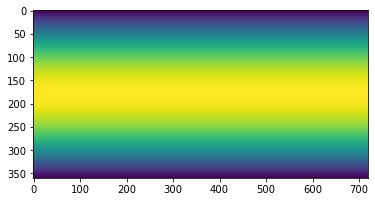

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc

ds = nc.Dataset("FLUXCOM/LE.RS_METEO.EBC-BWR.MLM-MARS.METEO-GSWP3.720_360.monthly.2000.nc")
#for var in ds.variables.values():
#    print(var)
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
LE = ds.variables['LE'][:]

weight1d = np.cos(np.deg2rad(lat))
weight2d = np.transpose(np.tile(weight1d, (720, 1)))
weight3d = np.tile(weight2d, (12, 1, 1))
plt.imshow(weight2d)

weight3d.shape
x = LE[0,:,:]

y = np.average(LE, weights=weight3d)
y

# Homework 5

In 2021, a paper was published on Nature entitled "A 10 per cent increase in global land evapotranspiration from 2003 to 2019". But this paper was retracted by the auhtors in the last week.

The main reason is that the authors made a mistake in caculating the global mean evapotranspiration by missing the area weights.

In this home work, you are expected to:
1. Calculate the global average (both area-weighted and not weighted) annual evapotranspiration (LE) from 2000 to 2014 using the provided FLUXCOM dataset. (3 pts)

2. Visualize the time series of the global annual LE (weighted and not weighted) with different colors/line styles (up to you, but we must see the difference between these two data). x axis is year and y axis is LE. Add trend lines with fitted linear regression functions (LE = a*year+b) to the chart. (5 pts)

3. Visualize unweighted 15-year mean LE map in robinson projection with colorbar. (2pts)

Pascolini-Campbell, M., Reager, J.T., Chandanpurkar, H.A. et al. RETRACTED ARTICLE: A 10 per cent increase in global land evapotranspiration from 2003 to 2019. Nature 593, 543–547 (2021). https://doi.org/10.1038/s41586-021-03503-5